# <center>**IROS**<center>

**Libraries**

In [1]:
import numpy as np
import dummymoon as dm

np.set_printoptions(precision=2, suppress=False)

In [2]:
#import importlib
#importlib.reload(dm)

**Loading Mask**

### Camera Parameters
mask_minx: -130.0
mask_miny: -130.0
mask_maxx: 130.0
mask_maxy: 130.0
mask_deltax: 0.25
mask_deltay: 0.4
mask_thickness: 0.15
slit_deltax: 0.25
slit_deltay: 14.0
detector_minx: -78.988
detector_maxx: 78.988
detector_miny: -76.5255
detector_maxy: 76.5255
mask_detector_distance: 202.9
open_fraction: 0.2157988165680473
real_open_fraction: 0.25048076923076923

### Shapes
Mask shape: (650, 1040)
Detector shape: (384, 632)
Sky shape: (1033, 1671)


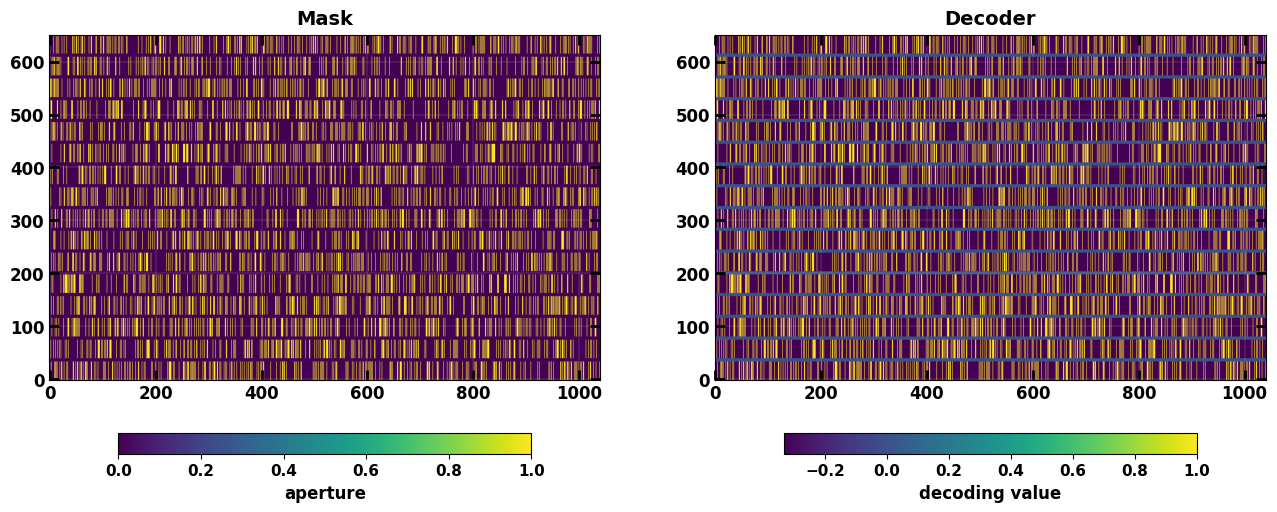

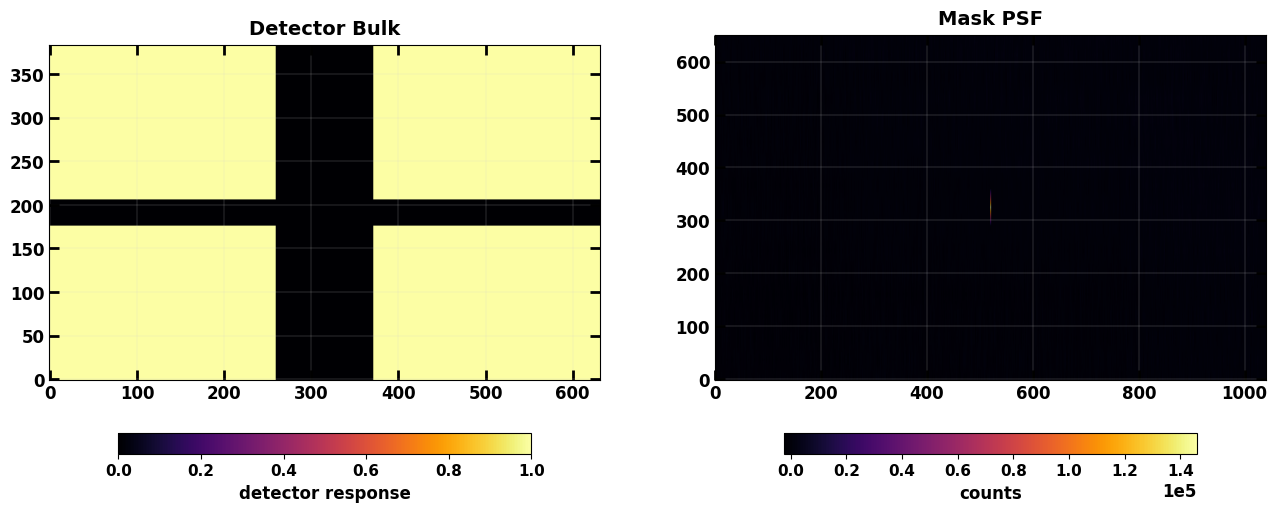

In [3]:
mask_fits_path = "/mnt/d/PhD_AASS/Coding/Images_fits/wfm_mask.fits"
wfm = dm.import_mask(mask_fits_path, True, True)

## **Basic IROS**

**Simulating Sky**

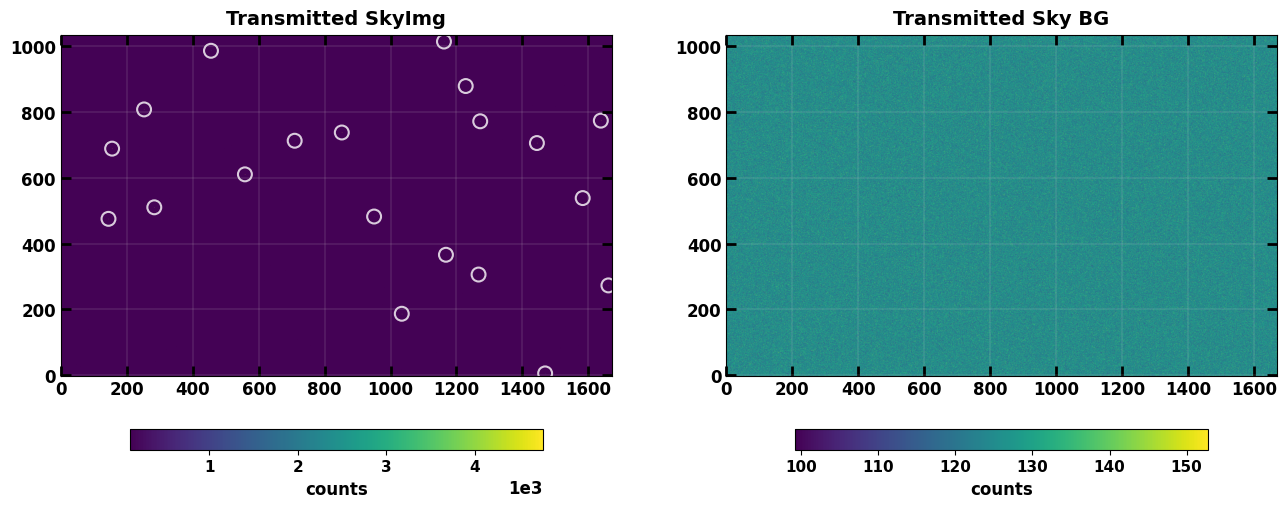

In [4]:
n_sources = 20
sources_flux = np.random.randint(int(5e3), int(2e4), size=n_sources)
sources_pos = None
sky_background_rate = int(5e2)

sky_image, sky_background, sources_pos = dm.sky_image_simulation(wfm.sky_shape, sources_flux, sources_pos, sky_background_rate)
transmitted_photons = dm.transmitted_sky_image(sky_image, wfm)

dm.image_plot([transmitted_photons, dm.transmitted_sky_image(sky_background, wfm)],
                ["Transmitted SkyImg", "Transmitted Sky BG"],
                cbarlabel=["counts", "counts"],
                cbarcmap=["viridis"]*2,
                simulated_sources=[sources_pos, None])

show_sky = False
if show_sky:
    idx = 2
    crp = 50
    dm.image_plot([dm.crop(sky_image, sources_pos[idx], (crp, crp)), dm.crop(sky_background, sources_pos[idx], (crp, crp))],
                  [f"Cropped Source {idx}", f"Cropped Source {idx} - Sky BG"],
                  cbarlabel=["counts", "counts"],
                  cbarcmap=["viridis"]*2)

**Sky Encoding and Sky Reconstruction**

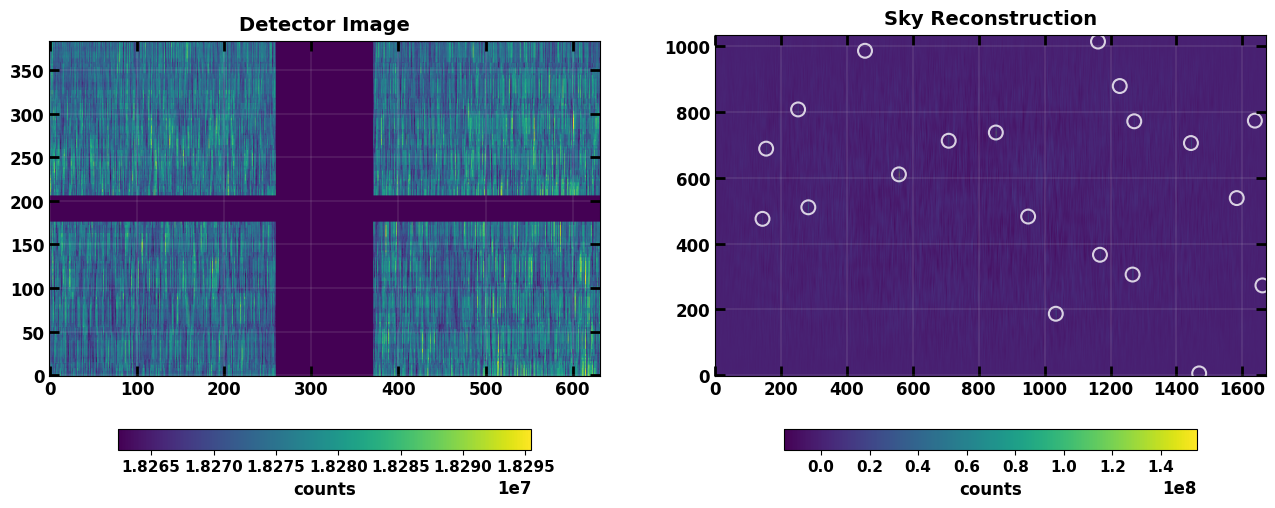

Simulated Source [0] transmitted counts: 4108 +/- 64
Reconstructed Source [0] counts: 1098 +/- 13
Source [0] reconstructed counts wrt simulated: 26.73%

Simulated Source [1] transmitted counts: 4050 +/- 64
Reconstructed Source [1] counts: 49 +/- 3
Source [1] reconstructed counts wrt simulated: 1.21%

Simulated Source [2] transmitted counts: 4608 +/- 68
Reconstructed Source [2] counts: 1715 +/- 15
Source [2] reconstructed counts wrt simulated: 37.22%

Simulated Source [3] transmitted counts: 2154 +/- 46
Reconstructed Source [3] counts: 26 +/- 2
Source [3] reconstructed counts wrt simulated: 1.20%

Simulated Source [4] transmitted counts: 2668 +/- 52
Reconstructed Source [4] counts: 242 +/- 8
Source [4] reconstructed counts wrt simulated: 9.05%

Simulated Source [5] transmitted counts: 4767 +/- 69
Reconstructed Source [5] counts: 1264 +/- 13
Source [5] reconstructed counts wrt simulated: 26.51%

Simulated Source [6] transmitted counts: 1439 +/- 38
Reconstructed Source [6] counts: 451 +/-

In [5]:
detector = dm.sky_encoding(transmitted_photons, wfm)

skyrec, skyvar = dm.sky_reconstruction(detector, wfm)
norm_skyrec, norm_skyvar = dm.skyrec_norm(skyrec, skyvar, wfm)


dm.image_plot([detector, skyrec],
              ["Detector Image", "Sky Reconstruction"],
              cbarlabel=["counts", "counts"],
              cbarlimits=[(np.unique(detector)[1], None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

dm.print_skyrec_info(transmitted_photons, norm_skyrec, norm_skyvar, sources_pos, False)

show_cropped_rec = False
if show_cropped_rec:
    idx = 0
    crp = 50
    dm.image_plot([dm.crop(skyrec, sources_pos[idx], (crp, crp)), dm.crop(wfm.balancing, sources_pos[idx], (crp, crp))],
                    [f"Cropped Reconstr. Source {idx}", f"Cropped Source {idx} - Balancing"],
                    cbarlabel=["counts", "counts"],
                    cbarcmap=["viridis"]*2)

show_slices = False
if show_slices:
    dm.enhance_skyrec_slices(skyrec, sources_pos)

SNR Source [0] value: 84
SNR Source [1] value: 18
SNR Source [2] value: 116
SNR Source [3] value: 11
SNR Source [4] value: 32
SNR Source [5] value: 98
SNR Source [6] value: 35
SNR Source [7] value: 153
SNR Source [8] value: 76
SNR Source [9] value: 170
SNR Source [10] value: 59
SNR Source [11] value: 38
SNR Source [12] value: 56
SNR Source [13] value: 106
SNR Source [14] value: 117
SNR Source [15] value: 25
SNR Source [16] value: 87
SNR Source [17] value: 78
SNR Source [18] value: 48
SNR Source [19] value: 24


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12459/1143686429.py:6: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


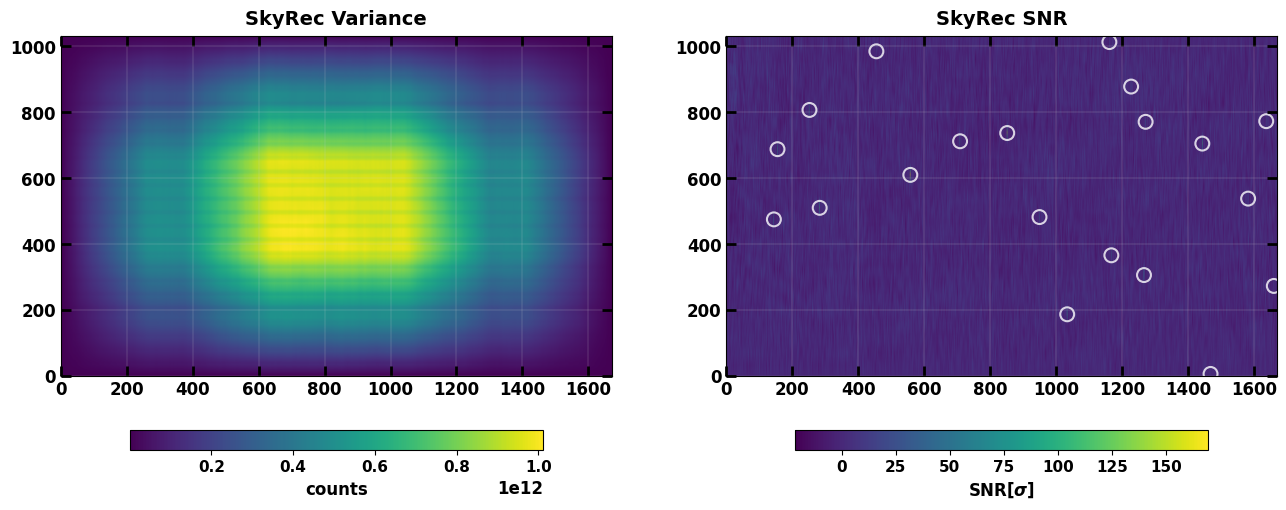

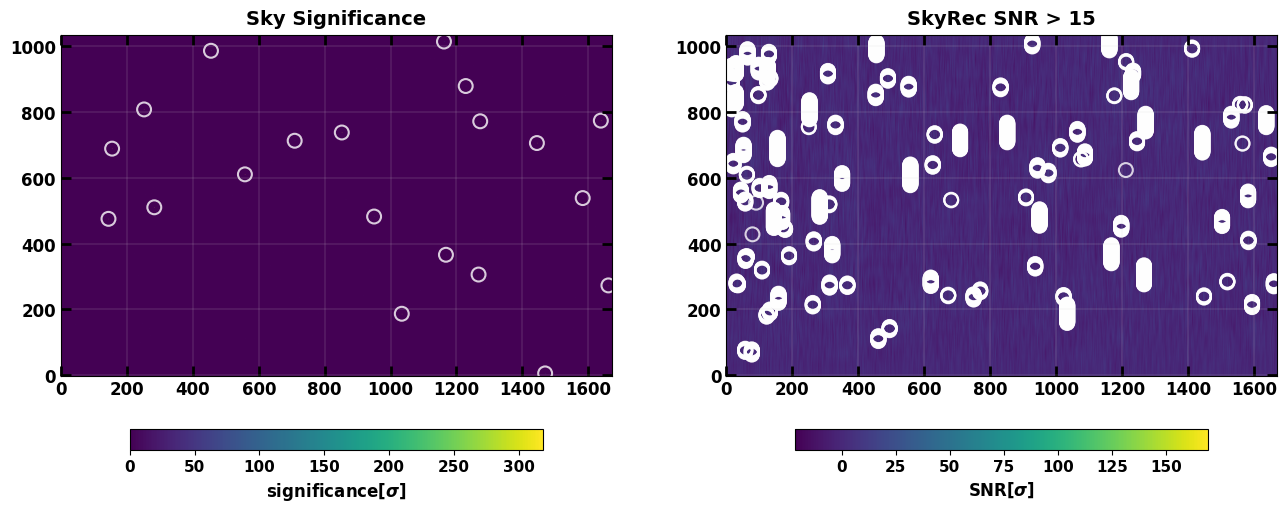

In [6]:
skysnr = dm.sky_snr(skyrec, skyvar)
dm.skyrec.print_snr_info(sky_image, skysnr, sources_pos, False)

dm.image_plot([skyvar, skysnr],
              ["SkyRec Variance", "SkyRec SNR"],
              cbarlabel=["counts", "SNR[$\sigma$]"],
              cbarlimits=[(None, None), (None, None)],
              cbarscinot=[True]*2,
              cbarcmap=["viridis"]*2,
              simulated_sources=[None, sources_pos])

thres_snr = 15
if thres_snr:
    sky_signif = dm.sky_significance(sky_image, sky_background_rate)
    dm.sky_snr_peaks(skysnr, thres_snr, sky_signif, sources_pos)

show_snr_distr = False
if show_snr_distr: dm.show_snr_distr(skysnr)

<br>

**Let's apply IROS...**

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12459/3943415602.py:26: SyntaxWarning: invalid escape sequence '\s'
  cbarlabel=["counts", "SNR[$\sigma$]"],


New source found at pos (610, 558)!


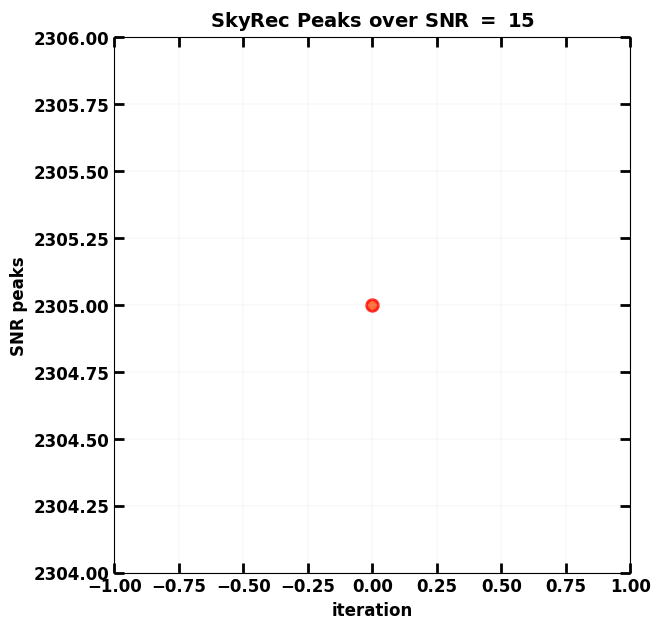

New source found at pos (737, 852)!
New source found at pos (510, 283)!
New source found at pos (187, 1034)!
New source found at pos (712, 709)!
New source found at pos (705, 1444)!
New source found at pos (306, 1267)!
New source found at pos (482, 950)!
New source found at pos (688, 155)!
New source found at pos (366, 1168)!
New source found at pos (807, 252)!


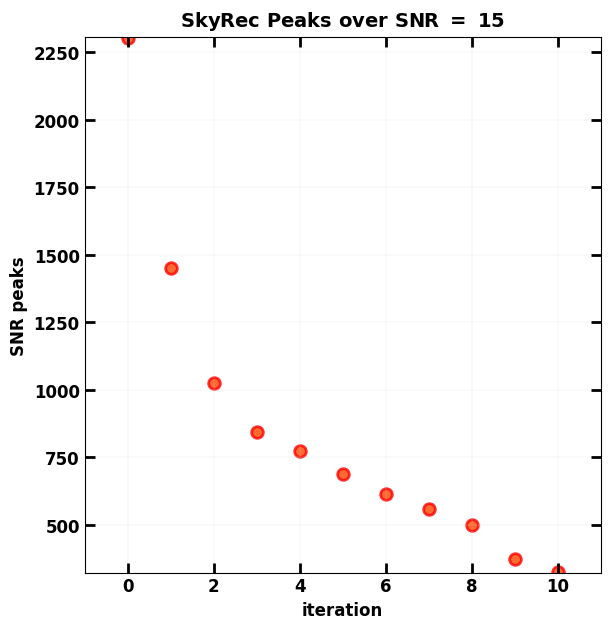

New source found at pos (475, 144)!
New source found at pos (771, 1272)!
New source found at pos (878, 1228)!
New source found at pos (985, 455)!
New source found at pos (538, 1583)!


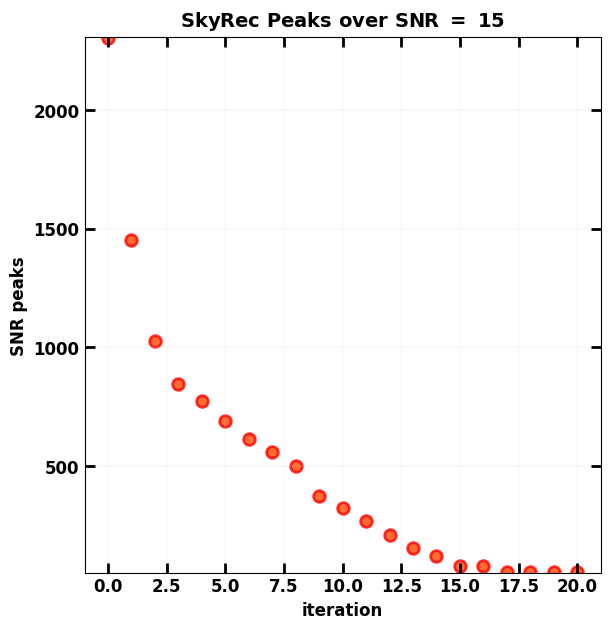

New source found at pos (773, 1638)!


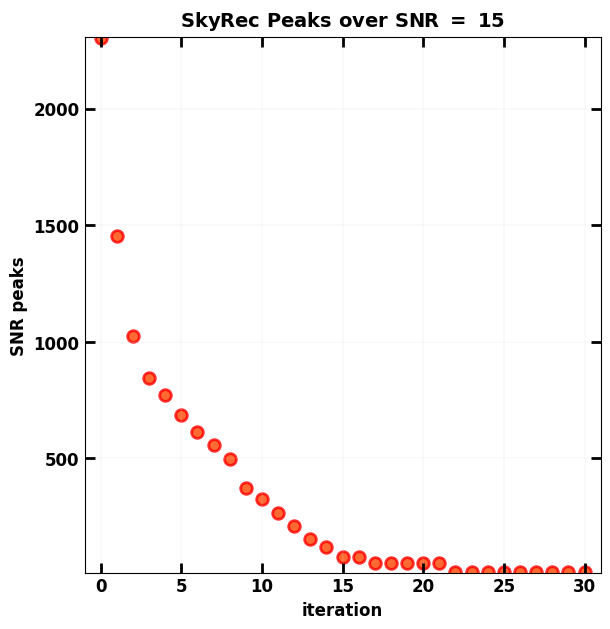

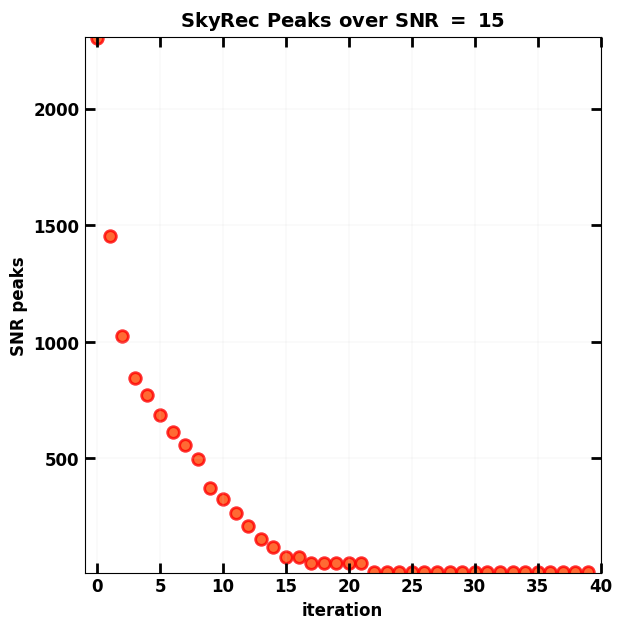

In [7]:
thres = 15
perform = True

if perform:

    loop = dm.IROS(
        data=detector,
        snr_threshold=thres,
        cam=wfm,
        max_iterations=40,
        snr_distr=False, #(True, 5),
        snr_peaks=(True, 10),
    )

    show_cropping = False
    show_results = False

    for idx, obj in enumerate(loop):
        sky, var, snr, sources = obj

        if show_cropping:
            k = 0
            print(f"Max SNR source pos: {sources['sources_pos'][k]}")
            dm.image_plot([dm.crop(sky, sources['sources_pos'][k], (30, 30)), dm.crop(snr, sources['sources_pos'][k], (30, 30))],
                        [f"Max SNR $S_{{{k}}}$ Reconstr.", f"Max SNR $S_{{{k}}}$ Value, iter. {idx}"],
                        cbarlabel=["counts", "SNR[$\sigma$]"],
                        cbarcmap=['viridis']*2)

        if show_results:
            dm.image_plot([skyrec, sky],
                            ["Sky Reconstruction", f"SkyRec IROS, iter. {idx}"],
                            cbarlabel=["counts", "counts"],
                            cbarcmap=['viridis']*2,
                            simulated_sources=[sources_pos]*2)

            dm.image_plot([snr, skyrec - sky],
                            [f"IROS iter. {idx} SNR", f"Residues: SkyRec - IROS{idx}"],
                            cbarlabel=["counts", "counts"],
                            cbarcmap=['viridis']*2,
                            simulated_sources=[sources_pos]*2)

#### IROS Sky Reconstruction Run ####
 - simulated sources: 20
 - IROS rec. sources: 17 :c

Source [0] Reconstruction:
 - simulated source transmitted counts: 4609 +/- 68
 - IROS rec. source counts: 3896 +/- 528
 - IROS rec. source SNR: 170
 - source rec. counts wrt simulated (with IROS): 84.53%

Source [1] Reconstruction:
 - simulated source transmitted counts: 4563 +/- 68
 - IROS rec. source counts: 3223 +/- 442
 - IROS rec. source SNR: 153
 - source rec. counts wrt simulated (with IROS): 70.64%

Source [2] Reconstruction:
 - simulated source transmitted counts: 4086 +/- 64
 - IROS rec. source counts: 2072 +/- 313
 - IROS rec. source SNR: 117
 - source rec. counts wrt simulated (with IROS): 50.71%

Source [3] Reconstruction:
 - simulated source transmitted counts: 3819 +/- 62
 - IROS rec. source counts: 1956 +/- 317
 - IROS rec. source SNR: 110
 - source rec. counts wrt simulated (with IROS): 51.21%

Source [4] Reconstruction:
 - simulated source transmitted counts: 2241 +/- 47
 - IR

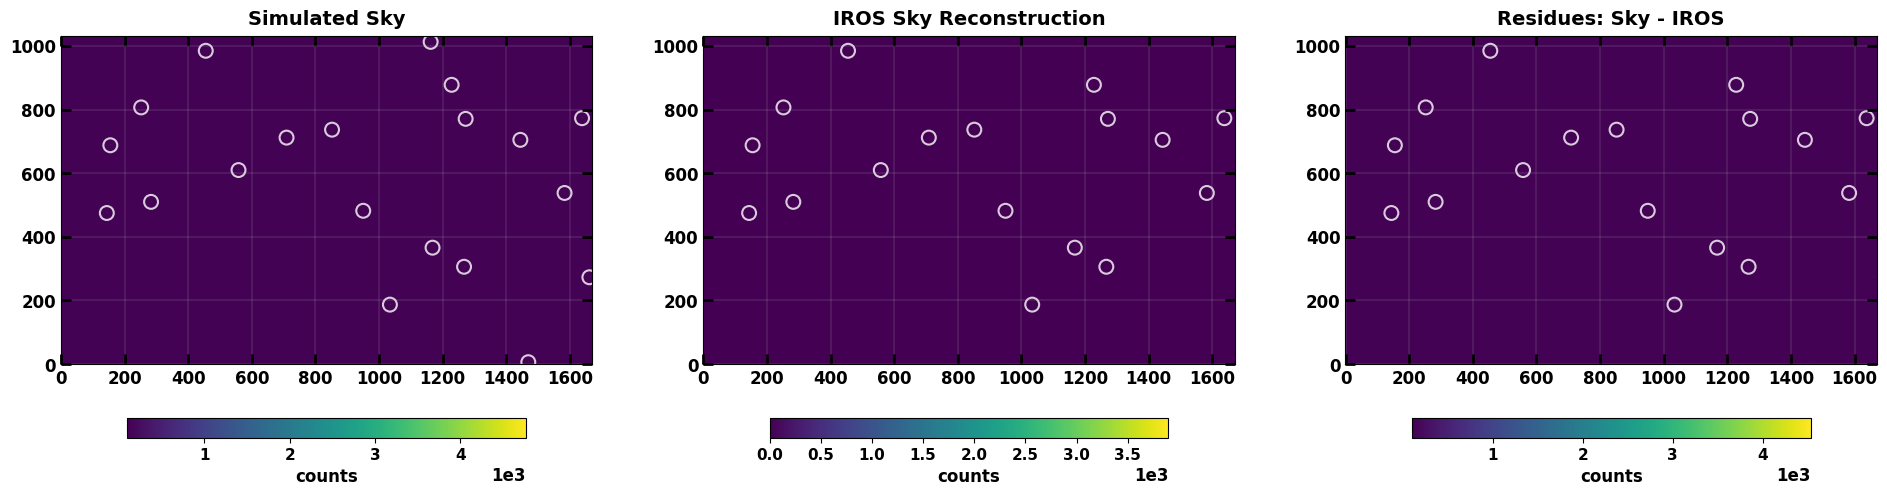

In [8]:
iros_sky, residues = dm.iros_skyrec(transmitted_photons, sources_pos, sources, wfm)

In [9]:
dm.iros_log(sources)

#### IROS Sky Reconstruction Log ####

Source [0] Log:
 - pos: (610, 558)
 - counts: 3896
 - std: 528
 - SNR: 169.53

Source [1] Log:
 - pos: (737, 852)
 - counts: 3223
 - std: 442
 - SNR: 153.26

Source [2] Log:
 - pos: (510, 283)
 - counts: 2072
 - std: 313
 - SNR: 117.04

Source [3] Log:
 - pos: (187, 1034)
 - counts: 1956
 - std: 317
 - SNR: 109.83

Source [4] Log:
 - pos: (712, 709)
 - counts: 1778
 - std: 510
 - SNR: 78.72

Source [5] Log:
 - pos: (705, 1444)
 - counts: 1694
 - std: 220
 - SNR: 114.16

Source [6] Log:
 - pos: (306, 1267)
 - counts: 1432
 - std: 270
 - SNR: 87.20

Source [7] Log:
 - pos: (482, 950)
 - counts: 1338
 - std: 602
 - SNR: 54.50

Source [8] Log:
 - pos: (688, 155)
 - counts: 1245
 - std: 166
 - SNR: 96.77

Source [9] Log:
 - pos: (366, 1168)
 - counts: 1178
 - std: 439
 - SNR: 56.25

Source [10] Log:
 - pos: (807, 252)
 - counts: 1162
 - std: 169
 - SNR: 89.23

Source [11] Log:
 - pos: (475, 144)
 - counts: 1050
 - std: 171
 - SNR: 80.43

Source [12] Lo